# Visualizing the Data

In this notebook, we're exploring different types of Feature extraction methods. we would use the following [dataset](https://mindbigdata.com/opendb/index.html), the data is stored in a simple text format outlined below. This format is designed to accommodate signals captured from various devices and brain locations, making it versatile for different types of EEG analysis.

## File Format Overview

Each line in the dataset represents a single signal with the following fields, separated by tabs:

- **\[id\]**: A numeric identifier for reference purposes only.
- **\[event id\]**: An integer used to distinguish the same event captured at different brain locations, applicable only to multichannel devices (all except MW).
- **\[device\]**: A 2-character string identifying the capture device. Possible values include:
  - "MW" for MindWave
  - "EP" for Emotiv Epoc
  - "MU" for Interaxon Muse
  - "IN" for Emotiv Insight
- **\[channel\]**: A string indicating the 10/20 brain location of the signal. Possible values vary by device:
  - MindWave: "FP1"
  - EPOC: "AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"
  - Muse: "TP9", "FP1", "FP2", "TP10"
  - Insight: "AF3", "AF4", "T7", "T8", "PZ"
- **\[code\]**: An integer identifying the thought/seen digit (0-9) or -1 for random signals not associated with any digit.
- **\[size\]**: An integer indicating the number of values captured in the 2-second signal. The sampling rate varies by device but is theoretically close to:
  - 512Hz for MW
  - 128Hz for EP and IN
  - 220Hz for MU
- **\[data\]**: A comma-separated list of numbers representing the time-series amplitude of the signal. The precision varies by device:
  - Integers for MW & MU
  - Real numbers for EP & IN

Note: The files do not contain headers, and each line corresponds to a unique signal.

With this structure in mind, we can now proceed to load and visualize the data, ensuring we accurately interpret the signals from different devices and channels.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_path = Path('../data')
file_path = data_path / 'EP1.01.txt'

columns = ['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']
data = pd.read_csv(file_path, delimiter='\t', header=None, names=columns)

In [3]:
data.head()

,id,event_id,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
1,67636,67635,EP,F7,6,260,"4489.230769,4475.384615,4474.358974,4486.66666..."
2,67637,67635,EP,F3,6,260,"4538.461538,4528.717948,4524.615384,4526.15384..."
3,67638,67635,EP,FC5,6,260,"4207.692307,4205.641025,4200.512820,4194.35897..."
4,67639,67635,EP,T7,6,260,"4497.948717,4498.461538,4494.871794,4497.94871..."


## Plotting Data for the "AF3" Channel

The "AF3" channel corresponds to a specific position on the frontal lobe cortex, which is part of the brain's 10–20 system used for EEG electrode placement. The frontal lobe is crucial for cognitive functions and control of voluntary movement or activity. Plotting the data from this channel can provide insights into the electrical activity in this part of the brain during different cognitive tasks.

For more detailed information on the 10–20 system and electrode placement, refer to the [10–20 system (EEG) Wikipedia page](https://en.wikipedia.org/wiki/10–20_system_(EEG)).

In the following sections, we'll load the EEG data for the "AF3" channel and visualize the signal. This will help us understand the typical patterns and any potential anomalies present in the data collected from the frontal lobe cortex.

In [4]:
AF3_signal_data = data.loc[data['channel'] == 'AF3']
AF3_signal_data

,id,event_id,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
14,67649,67636,EP,AF3,7,260,"4385.641025,4381.538461,4386.666666,4383.58974..."
28,67663,67637,EP,AF3,9,256,"4380.512820,4389.743589,4395.897435,4395.38461..."
42,67677,67638,EP,AF3,9,264,"4395.897435,4390.769230,4403.589743,4411.28205..."
56,67691,67639,EP,AF3,0,260,"4395.384615,4385.128205,4382.051282,4390.76923..."
...,...,...,...,...,...,...,...
910406,978041,132664,EP,AF3,-1,256,"4401.025641,4413.846153,4410.769230,4395.89743..."
910420,978055,132665,EP,AF3,-1,256,"4419.487179,4418.461538,4423.076923,4435.89743..."
910434,978069,132666,EP,AF3,-1,256,"4414.871794,4402.564102,4392.307692,4397.94871..."
910448,978083,132667,EP,AF3,-1,256,"4489.743589,4491.282051,4489.230769,4488.71794..."


## Focusing on Digit "1"

Upon initial inspection, our dataset appears to be quite extensive, encompassing a wide range of signals corresponding to various digits seen by the subjects. To narrow down our analysis and make it more manageable, we will apply a filter based on the digit code. Specifically, we will concentrate on the data related to the digit number "1."

By isolating signals associated with the subject perceiving the digit "1," we can delve deeper into the characteristics of these specific EEG patterns. This focused approach allows us to perform a more detailed analysis of the neural responses elicited by this particular visual stimulus.

In the following sections, we will implement this filtering and explore the EEG data corresponding to the perception of the digit "1," aiming to uncover any distinct features or patterns within these signals.


In [5]:
AF3_signal_data_digit_1 = AF3_signal_data.loc[AF3_signal_data['code'] == 1]
AF3_signal_data_digit_1

,id,event_id,device,channel,code,size,data
294,67929,67656,EP,AF3,1,260,"4396.923076,4404.615384,4403.589743,4402.56410..."
308,67943,67657,EP,AF3,1,256,"4390.256410,4387.179487,4387.179487,4389.74358..."
364,67999,67661,EP,AF3,1,260,"4373.333333,4376.923076,4392.307692,4390.25641..."
406,68041,67664,EP,AF3,1,261,"4385.641025,4388.205128,4383.076923,4382.56410..."
546,68181,67674,EP,AF3,1,256,"4369.743589,4381.025641,4385.128205,4384.10256..."
...,...,...,...,...,...,...,...
907942,975577,132488,EP,AF3,1,260,"4375.897435,4377.948717,4381.025641,4379.48717..."
907998,975633,132492,EP,AF3,1,260,"4431.794871,4422.564102,4420.000000,4427.17948..."
908082,975717,132498,EP,AF3,1,260,"4304.102564,4300.512820,4293.846153,4291.79487..."
908096,975731,132499,EP,AF3,1,260,"4264.102564,4265.641025,4274.871794,4274.87179..."


## Understanding the `event_id`

Recall that the `event_id` serves as an identifier within our dataset, indicating whether a specific recording is associated with a particular event, such as the display of a number or no display at all.

To start making sense of our data, let's select the first row available in our filtered dataset. This initial step will help us get a preliminary look at the data structure and the kind of information each recording holds.

This hands-on approach with a single data point will pave the way for a deeper dive into the dataset, allowing us to gradually build up our analysis and understanding of the neural signals captured during different events.

Let's explore this first entry and discuss its implications for our overall analysis.

In [6]:
AF3_signal_data_digit_1_first_index = AF3_signal_data_digit_1.head(1)
AF3_signal_data_digit_1_first_index

,id,event_id,device,channel,code,size,data
294,67929,67656,EP,AF3,1,260,"4396.923076,4404.615384,4403.589743,4402.56410..."


The 'data' appears to be a CSV type sting, we'll have to parse it to a list to be able to work with it.

In [7]:
signal_data = list(map(float, AF3_signal_data_digit_1_first_index['data'].to_list()[0].split(',')))
signal_data

[4396.923076,
 4404.615384,
 4403.589743,
 4402.564102,
 4411.794871,
 4413.846153,
 4401.538461,
 4398.461538,
 4400.0,
 4388.205128,
 4379.487179,
 4387.692307,
 4396.410256,
 4396.923076,
 4397.435897,
 4400.0,
 4400.51282,
 4399.487179,
 4400.0,
 4399.487179,
 4392.307692,
 4388.205128,
 4393.333333,
 4390.25641,
 4384.102564,
 4390.25641,
 4394.358974,
 4392.820512,
 4401.538461,
 4404.102564,
 4392.820512,
 4391.282051,
 4397.435897,
 4395.384615,
 4391.282051,
 4390.25641,
 4389.743589,
 4386.153846,
 4384.102564,
 4388.717948,
 4396.410256,
 4395.384615,
 4386.666666,
 4379.487179,
 4378.974358,
 4377.435897,
 4377.435897,
 4380.0,
 4381.025641,
 4387.179487,
 4394.358974,
 4384.102564,
 4376.410256,
 4391.794871,
 4402.564102,
 4391.794871,
 4384.615384,
 4388.205128,
 4381.538461,
 4370.25641,
 4372.307692,
 4380.0,
 4385.128205,
 4388.205128,
 4389.230769,
 4387.692307,
 4383.589743,
 4375.897435,
 4375.897435,
 4387.179487,
 4385.641025,
 4373.846153,
 4375.384615,
 4376.92

## Streamlining Data Parsing

Having successfully parsed our data, it's clear that this process could greatly benefit from being encapsulated within a function. This approach not only enhances the readability and organization of our code but also significantly improves its reusability for similar tasks in the future.

By developing a dedicated function for data parsing, we can effortlessly apply the same logic to various datasets without the need for repetitive code. This function will enable us to input raw data and output a structured format, ready for further analysis or visualization.

In the next section, we will design and implement such a function, focusing on flexibility and ease of use to accommodate different types of EEG data.

In [8]:
def parse_data(data: str) -> list:
    return list(map(float, data.split(',')))

## Parsing the Entire Dataset

With our data parsing function in place, it's time to apply it across the entire dataset. This step is crucial for transforming our raw data into a structured format that's much more conducive to analysis and visualization.

In the following section, we'll execute our parsing function on the entire dataset, preparing our data for the in-depth analysis that lies ahead.

In [9]:
AF3_signal_data_digit_1.loc[:, 'data'] = AF3_signal_data_digit_1['data'].apply(parse_data)
AF3_signal_data_digit_1.head()

,id,event_id,device,channel,code,size,data
294,67929,67656,EP,AF3,1,260,"[4396.923076, 4404.615384, 4403.589743, 4402.5..."
308,67943,67657,EP,AF3,1,256,"[4390.25641, 4387.179487, 4387.179487, 4389.74..."
364,67999,67661,EP,AF3,1,260,"[4373.333333, 4376.923076, 4392.307692, 4390.2..."
406,68041,67664,EP,AF3,1,261,"[4385.641025, 4388.205128, 4383.076923, 4382.5..."
546,68181,67674,EP,AF3,1,256,"[4369.743589, 4381.025641, 4385.128205, 4384.1..."


## Visualizing Amplitudes by Digit

Having organized our data effectively, our next step is to visualize the amplitude variations for a specific digit across all relevant EEG signals. This visualization will provide us with valuable insights into the consistency and variation of neural responses elicited by the perception of this digit.

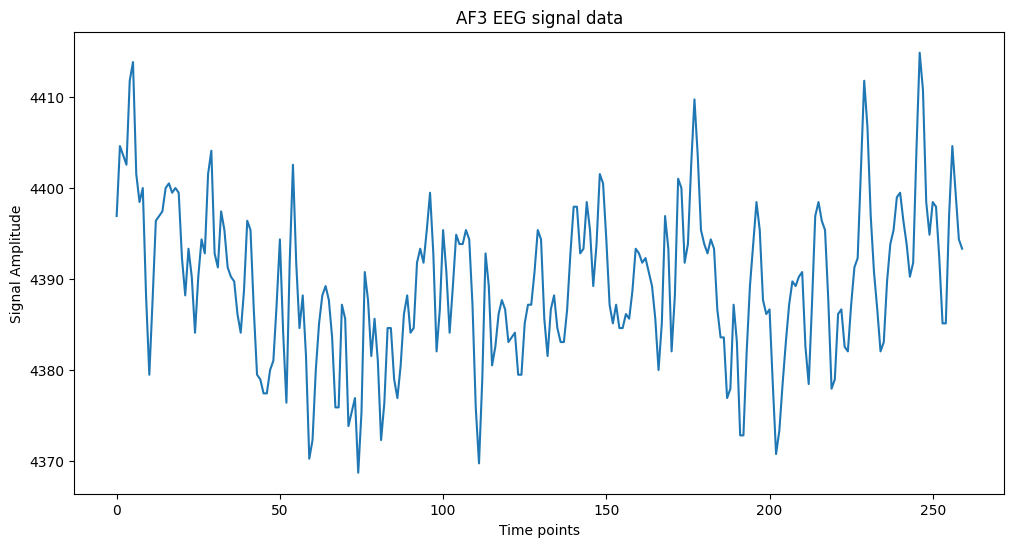

In [10]:
plt.figure(figsize=(12,6))
plt.plot(signal_data)
plt.title('AF3 EEG signal data')
plt.xlabel('Time points')
plt.ylabel('Signal Amplitude')
plt.show()

Now we should try to visualise a set of signals for the same number from the same channel

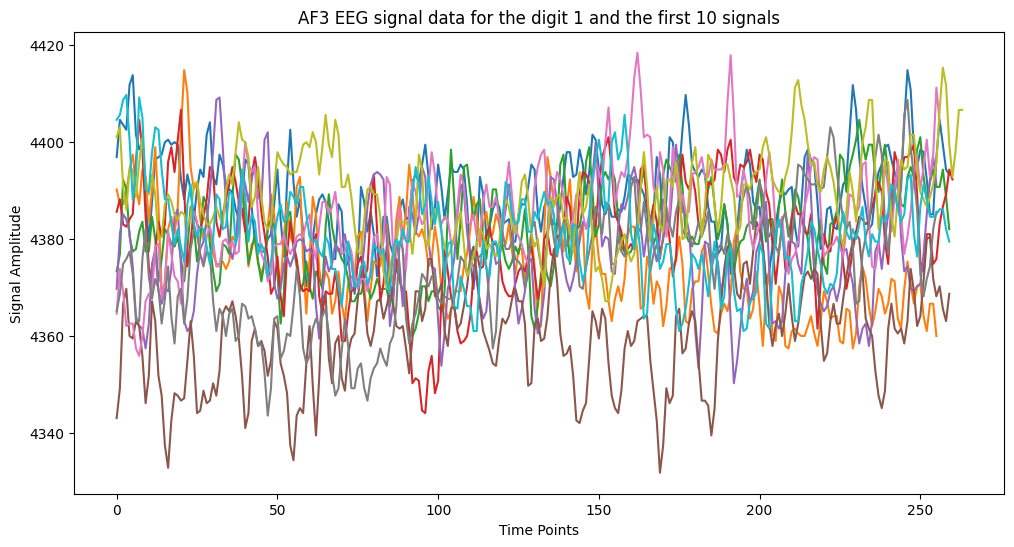

In [11]:
plt.figure(figsize=(12,6))
for event in AF3_signal_data_digit_1['data'][:10]:
    plt.plot(event)
    
plt.title('AF3 EEG signal data for the digit 1 and the first 10 signals')
plt.xlabel('Time Points')
plt.ylabel('Signal Amplitude')
plt.show()

## Addressing the Complexity in Signal Visualization

Upon attempting to visualize the amplitudes for the same digit across different events, we're met with a rather intricate and overwhelming display. Even when limiting our view to just the first 10 events, the complexity remains. This observation underscores the challenge of directly interpreting raw EEG data due to its high dimensionality and variability.

### Moving Towards Feature Extraction

To navigate through this complexity and extract meaningful information from our data, we will pivot to employing feature extraction techniques. Feature extraction will enable us to distill the essential characteristics from the EEG signals, making the data more interpretable and useful for subsequent analysis.

### Exploring Feature Extraction Methods

We will explore the following four feature extraction methods, each offering unique insights into the EEG signals:

1. **Fourier Transform**: By transforming time-series EEG data into the frequency domain, we can identify dominant frequencies, shedding light on brain activity patterns associated with different cognitive states.
2. **Wavelet Transform**: Offering a time-frequency analysis, this method is adept at handling the non-stationary nature of EEG data, capturing both temporal and frequency information effectively.
3. **Hjorth Parameters**: Comprising activity, mobility, and complexity, these parameters can be derived directly from the time-domain signal, offering a direct insight into the signal's intrinsic characteristics.
4. **Power Spectral Density (PSD)**: This method estimates the power distribution across various frequency bands, pivotal for detecting changes in brain states.

#### Diving Deeper: Fourier Transform in EEG Analysis

Consider the Fourier Transform as a tool that dissects your brain's activity, akin to analyzing a complex symphony. Each brainwave frequency represents a different instrument, contributing uniquely to the overall 'music' of brain activity. The Fourier Transform, much like a music analyst, deconstructs this symphony to identify each 'instrument' and its contribution, revealing the predominant frequencies and their amplitudes. This process not only demystifies the rhythmic patterns of brain activity but also enhances our understanding of the brain's response to various stimuli and tasks.

To perform the Fourier Transform on our EEG data, we will utilize the powerful `numpy` library, which conveniently offers this functionality.

let's go back to working with a single signal for the digit "1". Once we will be done with it we could apply the same transformation to all the data and get more interesting information.

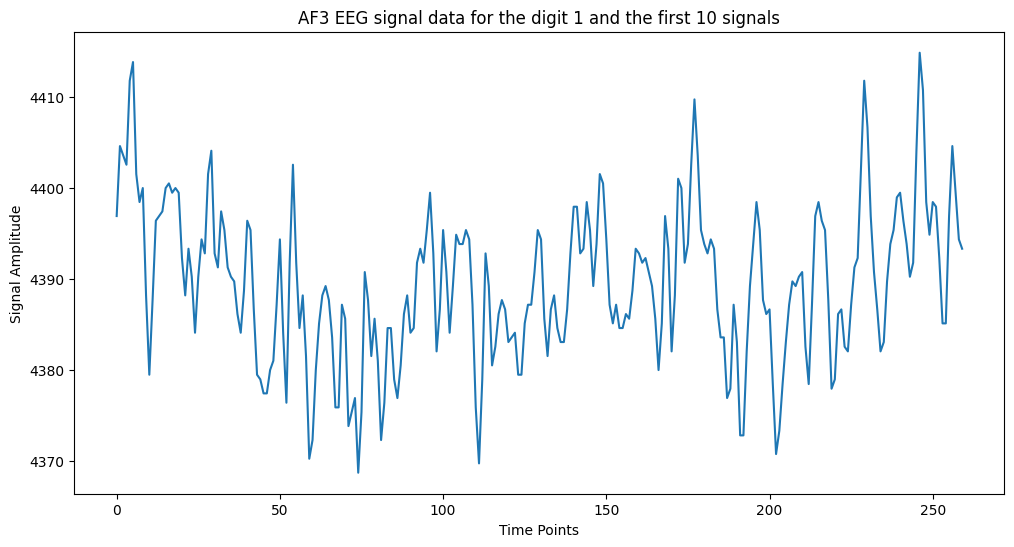

In [12]:
plt.figure(figsize=(12,6))
plt.plot(AF3_signal_data_digit_1['data'].iloc[0])
    
plt.title('AF3 EEG signal data for the digit 1')
plt.xlabel('Time Points')
plt.ylabel('Signal Amplitude')
plt.show()

Luckly for us the library numpy has already implemented the Fourier Transformation, which is really simple to use. Just by passing the signal to np.fft.fft() method.

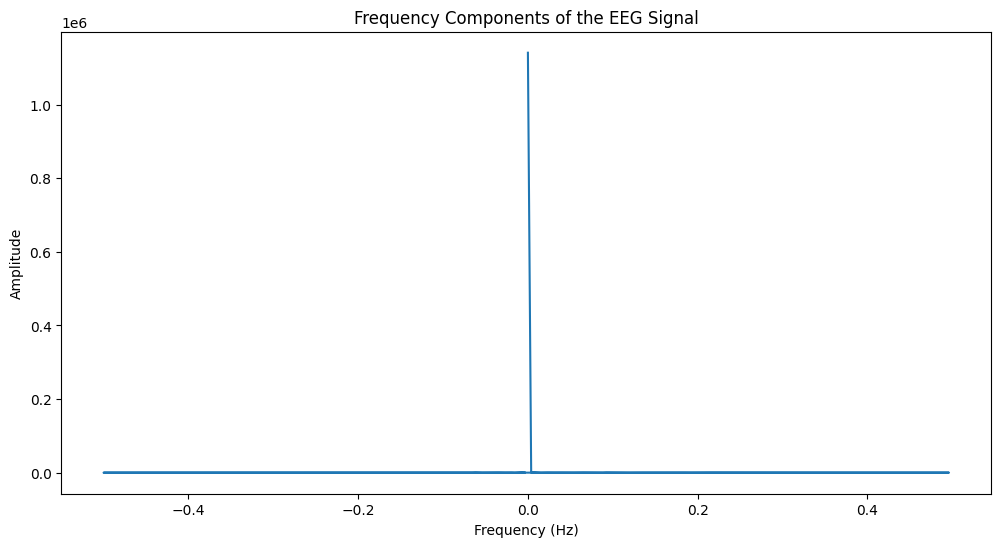

In [13]:
import numpy as np

signal = AF3_signal_data_digit_1['data'].iloc[0]

fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal))

plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_result.real)
plt.title('Frequency Components of the EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

## Addressing High Amplitude at Zero Frequency

Upon analyzing the results of our Fourier Transform, we've encountered an unexpected issue: an excessively high amplitude near the zero frequency. This anomaly makes it challenging to discern the true characteristics of the frequency spectrum derived from our EEG data.

### The Underlying Cause
The root of this problem lies in the average value of our signal being significantly distant from zero. In the realm of Fourier Transform, this average is perceived as a constant component, akin to a zero-frequency element within our signal. 

### The Solution
To rectify this and unveil a more meaningful frequency spectrum, we must eliminate this zero-frequency component. This can be achieved by simply subtracting the mean from our signal. This adjustment ensures that our signal's average aligns with zero, thereby removing the undue influence of the constant component and allowing the true frequency characteristics to emerge clearly.

By applying this correction, we can expect a more accurate and insightful frequency analysis, enabling us to better understand the nuances of our EEG data.

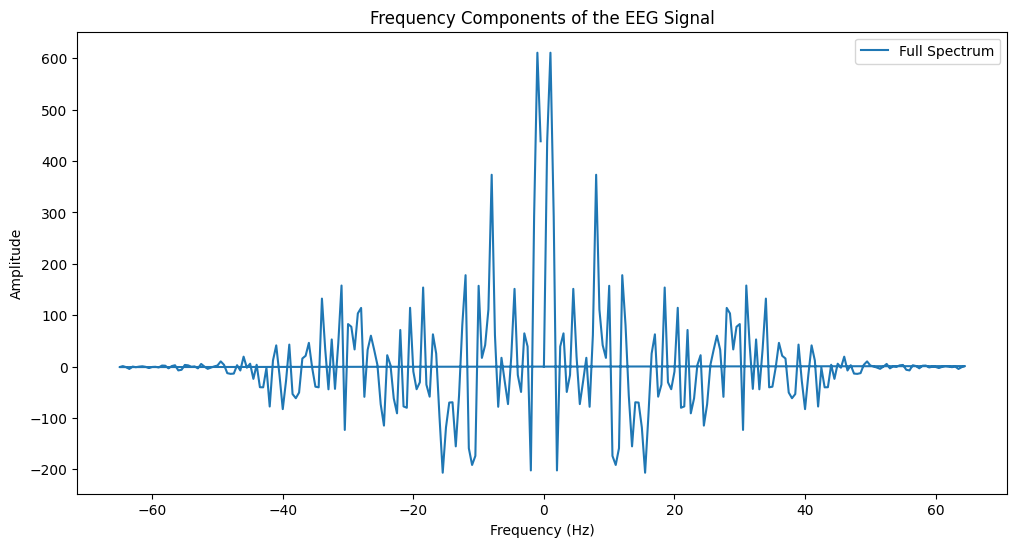

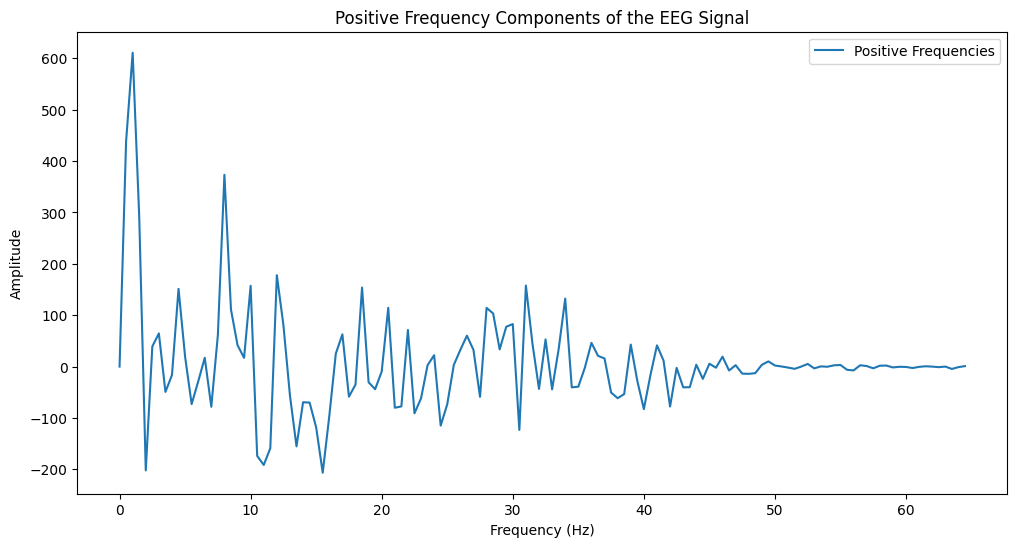

In [14]:
signal = AF3_signal_data_digit_1['data'].iloc[0]
signal_mean_corrected = signal - np.mean(signal)

sampling_rate = AF3_signal_data_digit_1['size'].iloc[0] / 2 # for every reading the sampling rate is a bit different so we need to accomodate to that
# [size]: a integer, to identify the size in number of values captured in the 2 seconds of this signal, since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds.

fft_result = np.fft.fft(signal_mean_corrected)
frequencies = np.fft.fftfreq(len(signal_mean_corrected), d=1/sampling_rate)

n = len(signal_mean_corrected)
positive_frequencies = frequencies[:n // 2]
positive_fft_result = fft_result[:n // 2].real

# Plot the full frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_result.real, label='Full Spectrum')
plt.title('Frequency Components of the EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot only the positive frequencies
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_fft_result, label='Positive Frequencies')
plt.title('Positive Frequency Components of the EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Insights from the Fourier Transform Analysis

After applying the necessary adjustments to our Fourier Transform analysis, we are now presented with a more revealing and interpretable frequency spectrum of our EEG data. But what exactly are we observing here?

### EEG Frequency Bands
Our analysis highlights the presence of distinct frequency bands, each associated with different aspects of brain activity. According to [EEG terminology and waveforms](https://www.learningeeg.com/terminology-and-waveforms), the key frequency bands to be aware of include:

- **Delta (0-4 Hz):** These are the slowest brain waves, typically associated with deep, dreamless sleep and restorative processes in the brain.
- **Theta (4-8 Hz):** These waves are often linked to creativity, intuition, daydreaming, and deep meditative states.
- **Alpha (8-13 Hz):** Alpha waves indicate a relaxed, yet alert state of mind, common during light meditation and moments of calm.
- **Beta (13-30 Hz):** These faster waves are associated with active, analytical thought, problem-solving, and focus.
- **Gamma (30-100 Hz):** The fastest of the brain waves, gamma waves are related to higher processing tasks and cognitive functioning.

### Interpretation
Each of these frequency bands plays a critical role in our cognitive processes and overall brain function. While a deeper dive into the significance and implications of these waves would be fascinating, time constraints limit our exploration for now. Nonetheless, recognizing these bands in our EEG data is a crucial step towards understanding the underlying brain activity and its relation to cognitive states and tasks.

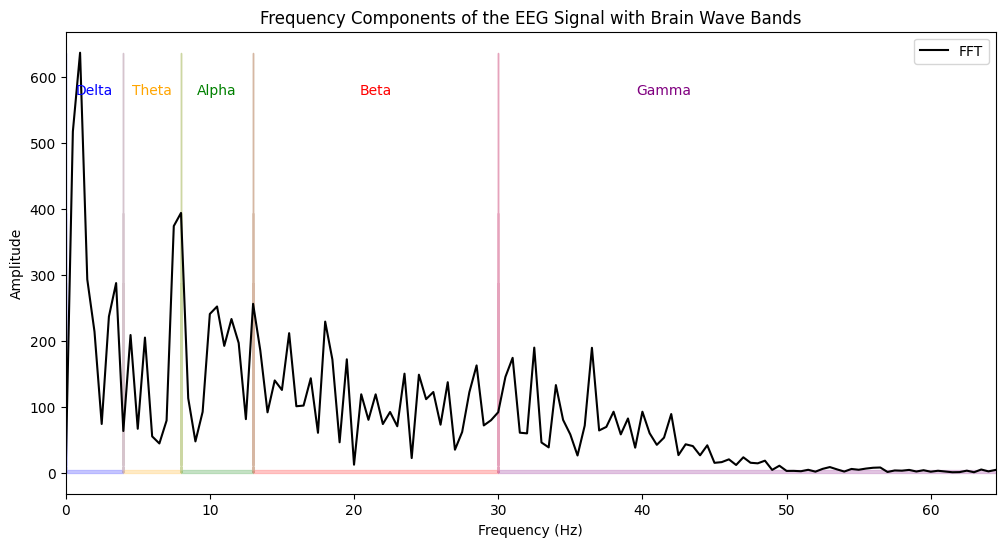

In [15]:
fft_result = np.fft.fft(signal_mean_corrected)
frequencies = np.fft.fftfreq(len(signal_mean_corrected), d=1/sampling_rate)

n = len(signal_mean_corrected)
positive_frequencies = frequencies[:n // 2]
positive_fft_result = fft_result[:n // 2]

plt.figure(figsize=(12, 6))

# Plot the FFT result
plt.plot(positive_frequencies, np.abs(positive_fft_result), label='FFT', color='k')

# Delta waves (0-4 Hz)
plt.fill_betweenx(np.abs(positive_fft_result), 0, 4, color='blue', alpha=0.2)
plt.text(2, max(np.abs(positive_fft_result)) * 0.9, 'Delta', ha='center', color='blue')

# Theta waves (4-8 Hz)
plt.fill_betweenx(np.abs(positive_fft_result), 4, 8, color='orange', alpha=0.2)
plt.text(6, max(np.abs(positive_fft_result)) * 0.9, 'Theta', ha='center', color='orange')

# Alpha waves (8-13 Hz)
plt.fill_betweenx(np.abs(positive_fft_result), 8, 13, color='green', alpha=0.2)
plt.text(10.5, max(np.abs(positive_fft_result)) * 0.9, 'Alpha', ha='center', color='green')

# Beta waves (13-30 Hz)
plt.fill_betweenx(np.abs(positive_fft_result), 13, 30, color='red', alpha=0.2)
plt.text(21.5, max(np.abs(positive_fft_result)) * 0.9, 'Beta', ha='center', color='red')

# Gamma waves (30-100 Hz)
plt.fill_betweenx(np.abs(positive_fft_result), 30, 100, color='purple', alpha=0.2)
plt.text(41.5, max(np.abs(positive_fft_result)) * 0.9, 'Gamma', ha='center', color='purple')

plt.title('Frequency Components of the EEG Signal with Brain Wave Bands')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, max(positive_frequencies))  # Adjust as needed
plt.legend()
plt.show()

## Introduction to Power Spectral Density (PSD) Analysis

With the Fourier Transform providing us insights into the frequencies and amplitudes present in our EEG data, we're now equipped to delve deeper into our feature extraction journey. Next on our list is the **Power Spectral Density (PSD)** analysis.

### Understanding PSD
PSD takes the concepts of the Fourier Transform a step further by focusing on the power distribution across various frequency components of a signal. For EEG data, this means PSD can tell us how much power or energy is present in specific frequency bands, such as Delta, Theta, Alpha, Beta, and Gamma waves.

### Why PSD Matters in EEG
The significance of PSD in EEG analysis cannot be overstated. Each frequency band in EEG data is linked to distinct brain states and cognitive activities. By examining the power distribution within these bands, PSD provides invaluable insights into brain function, offering a window into the underlying mechanisms of thought, emotion, and consciousness.

In essence, PSD helps us paint a more detailed picture of brain activity, enhancing our understanding of complex neural processes and paving the way for advanced cognitive and neurological research.